In [18]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


from csv import writer


In [19]:
import pandas as pd
df=pd.read_csv('loan_data_9578.csv')
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns = df.columns.str.strip()
#df['education'] = df['education'].str.strip()
#df['self_employed'] = df['self_employed'].str.strip()
#df['loan_status'] = df['loan_status'].str.strip()
#df.drop(columns=['loan_id'], inplace=True)
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [21]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [22]:
# List of features to analyze
features_to_analyze = ['inq.last.6mths', 'delinq.2yrs', 'pub.rec']

# Loop through each feature
for feature in features_to_analyze:
    # Get unique values and their counts
    unique_values_counts = df[feature].value_counts()

    # Calculate the percentage per unique value
    percentages = (unique_values_counts / unique_values_counts.sum()) * 100

    # Sort the unique values in ascending order
    unique_values_counts = unique_values_counts.sort_index()
    percentages = percentages.sort_index()

    # Print the results
    print(f"Feature: {feature}")
    print("Unique Values\tCounts\tPercentage")
    for value, count, percentage in zip(unique_values_counts.index, unique_values_counts, percentages):
        print(f"{value}\t\t{count}\t\t{percentage:.2f}%")
    print("\n")

Feature: inq.last.6mths
Unique Values	Counts	Percentage
0		3637		37.97%
1		2462		25.70%
2		1384		14.45%
3		864		9.02%
4		475		4.96%
5		278		2.90%
6		165		1.72%
7		100		1.04%
8		72		0.75%
9		47		0.49%
10		23		0.24%
11		15		0.16%
12		15		0.16%
13		6		0.06%
14		6		0.06%
15		9		0.09%
16		3		0.03%
17		2		0.02%
18		4		0.04%
19		2		0.02%
20		1		0.01%
24		2		0.02%
25		1		0.01%
27		1		0.01%
28		1		0.01%
31		1		0.01%
32		1		0.01%
33		1		0.01%


Feature: delinq.2yrs
Unique Values	Counts	Percentage
0		8458		88.31%
1		832		8.69%
2		192		2.00%
3		65		0.68%
4		19		0.20%
5		6		0.06%
6		2		0.02%
7		1		0.01%
8		1		0.01%
11		1		0.01%
13		1		0.01%


Feature: pub.rec
Unique Values	Counts	Percentage
0		9019		94.16%
1		533		5.56%
2		19		0.20%
3		5		0.05%
4		1		0.01%
5		1		0.01%




In [23]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'education' column
df['purpose'] = label_encoder.fit_transform(df['purpose'])

# Apply label encoding to the 'self_employed' column
#df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
#df['self_employed'] = df['self_employed'].replace(['Yes', 'No'], [1,0])

# Apply label encoding to the 'loan_status' column
#df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
#df['loan_status'] = df['loan_status'].replace(['Approved', 'Rejected'], [1,0])

# Display the updated DataFrame with encoded columns
print(df[['purpose']])

      purpose
0           2
1           1
2           2
3           2
4           1
...       ...
9573        0
9574        0
9575        2
9576        4
9577        2

[9578 rows x 1 columns]


In [24]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [25]:
#df['cibil_grp'] = np.where((df['cibil_score']>=300) & (df['cibil_score']<=500),"1",
#                           np.where((df['cibil_score']>500)& (df['cibil_score']<600),"2","3"))

In [26]:
# Define the feature columns (X) and target column (y)
y = df['not.fully.paid']  # Target variable
x = df.drop(columns=['not.fully.paid'])  # Drop 'loan_status' column to get feature columns
x[x < 0]=0
x

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0


In [27]:
#Univariate Selection
from sklearn.feature_selection import SelectKBest, chi2
select_feature = SelectKBest(chi2, k=7).fit(x, y)
selected_features_df = pd.DataFrame({'Feature':list(x.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
8,revol.bal,1.860498e+06
7,days.with.cr.line,1.119078e+04
3,installment,3.211572e+03
9,revol.util,1.160848e+03
10,inq.last.6mths,6.564686e+02
6,fico,4.351062e+02
5,dti,5.025229e+01
0,credit.policy,4.670311e+01
1,purpose,3.217312e+01
12,pub.rec,2.505498e+01


In [28]:
#x = x.drop(columns=['log.annual.inc'])

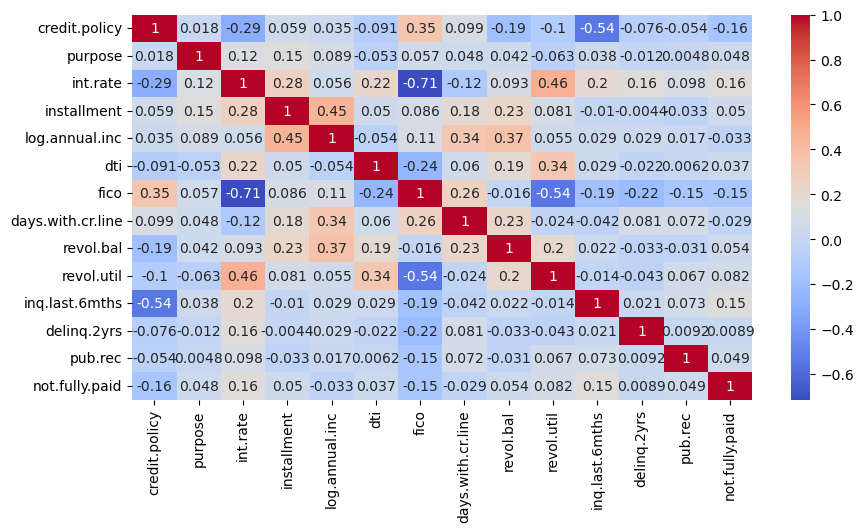

In [29]:
# Get the data types of each column
column_types = df.dtypes

# Select only the numeric columns (assuming 'df' is your DataFrame)
numeric_columns = df.select_dtypes(include=[np.number])

# Create a correlation matrix for the numeric columns
c = numeric_columns.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(c, cmap="coolwarm", annot=True)
plt.show()

In [30]:
from mlencoders.weight_of_evidence_encoder import WeightOfEvidenceEncoder

enc = WeightOfEvidenceEncoder(cols=x.columns)
X_encoded = enc.fit_transform(x, y)
x=X_encoded
x.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,-0.229783,-0.058168,-0.162509,0.000000,-0.155914,0.000000,0.021305,0.000000,0.0,0.676995,-0.359418,-0.014796,-0.040583
1,-0.229783,-0.376075,0.416111,0.000000,-0.303834,0.000000,0.032082,-0.421617,0.0,-0.539400,-0.359418,-0.014796,-0.040583
2,-0.229783,-0.058168,-0.229245,0.964677,0.191487,0.000000,0.070609,-1.600272,0.0,-0.421617,-0.068201,-0.014796,-0.040583
3,-0.229783,-0.058168,0.271530,0.000000,-0.155914,0.000000,-0.122170,0.000000,0.0,0.676995,-0.068201,-0.014796,-0.040583
4,-0.229783,-0.376075,0.099680,0.000000,0.000000,0.559212,0.465686,0.000000,0.0,0.271530,-0.359418,0.102224,-0.040583


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state=0)

priors: None
var_smoothing: 0.2154434690031884
[[1543   68]
 [ 145  160]]


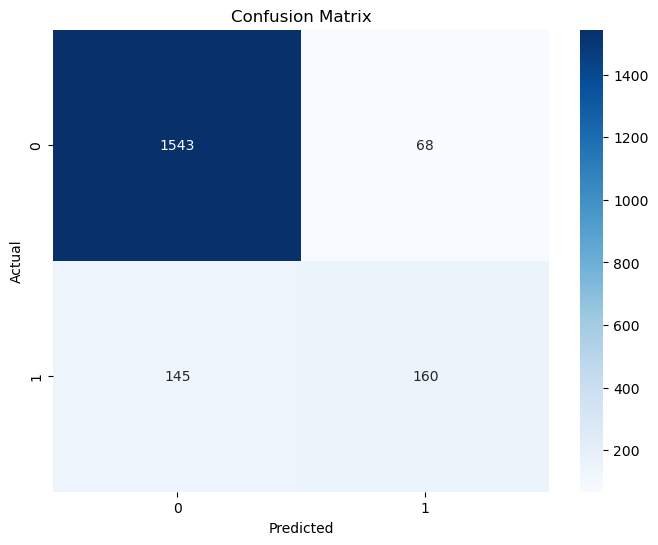

GaussianNB Classifier Metrics:
AUC: 0.7411901781807452
Accuracy: 0.8888308977035491
Precision: 0.8802971942652345
Recall: 0.8888308977035491
Specificity: 0.5935494586579412
F1 Score: 0.8820982253588955
classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      1611
           1       0.70      0.52      0.60       305

    accuracy                           0.89      1916
   macro avg       0.81      0.74      0.77      1916
weighted avg       0.88      0.89      0.88      1916

----------------------------------
1543 68 145 160
pod:  0.5245901639344263
pof:  0.04220980757293606
AUC:  0.7411901781807452
accuracy:  0.8888308977035491
precision:  0.7017543859649122
recall:  0.5245901639344263
specificity:  0.957790192427064
F1:  0.6003752345215759


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a GaussianNB instance
gaussian_nb = GaussianNB(var_smoothing=0.2154434690031884)

params = gaussian_nb.get_params()

# Print all parameter values
for param, value in params.items():
    print(f"{param}: {value}")
    
    
# Train the logistic regression model
gaussian_nb.fit(x_train, y_train)

# Predict on the test set
y_pred = gaussian_nb.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

 

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("GaussianNB Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("classification Report:\n", classification_rep)

print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'CONV_WOE', 'NB', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


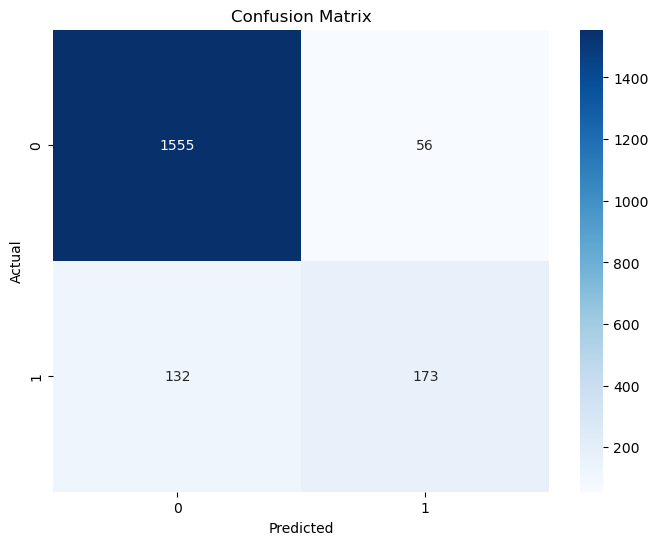

LogisticRegression Classifier Metrics:
AUC: 0.7662260483764285
Accuracy: 0.9018789144050104
Precision: 0.8952826190089174
Recall: 0.9018789144050104
Specificity: 0.6305731823478464
F1 Score: 0.8960270794135319
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1611
           1       0.76      0.57      0.65       305

    accuracy                           0.90      1916
   macro avg       0.84      0.77      0.80      1916
weighted avg       0.90      0.90      0.90      1916

----------------------------------
1555 56 132 173
pod:  0.5672131147540984
pof:  0.03476101800124146
AUC:  0.7662260483764285
accuracy:  0.9018789144050104
precision:  0.7554585152838428
recall:  0.5672131147540984
specificity:  0.9652389819987586
F1:  0.6479400749063672


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a LogisticRegression instance
#logistic_reg = LogisticRegression(random_state=42)
#logistic_reg = LogisticRegression(C=100, penalty='l1', solver='liblinear')
logistic_reg = LogisticRegression(C=1, multi_class='ovr', penalty='l1', solver='liblinear')

# Print all parameter
print(logistic_reg.get_params())

# Train the logistic regression model
logistic_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(x_test)



# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

 

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("LogisticRegression Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 

# Print the classification report
print("Classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'CONV_WOE', 'LR', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

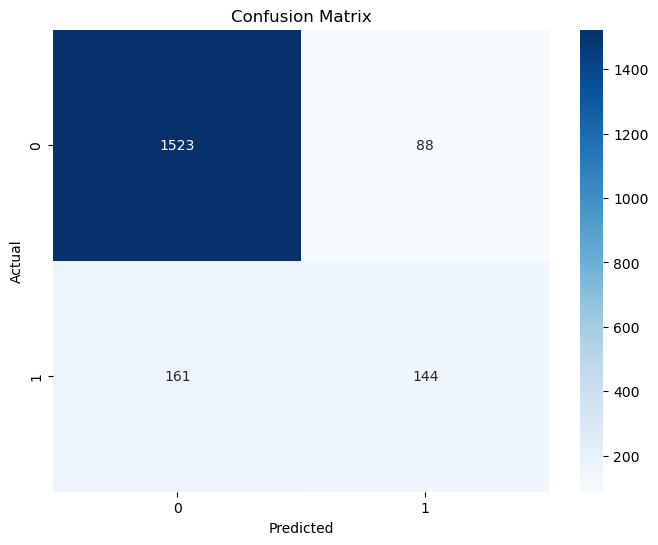

Decision Tree Classifier Metrics:
AUC: 0.7087533453409449
Accuracy: 0.8700417536534447
Precision: 0.8592325474841364
Recall: 0.8700417536534447
Specificity: 0.5474649370284452
F1 Score: 0.8626480632049243
classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      1611
           1       0.62      0.47      0.54       305

    accuracy                           0.87      1916
   macro avg       0.76      0.71      0.73      1916
weighted avg       0.86      0.87      0.86      1916

----------------------------------
1523 88 161 144
pod:  0.4721311475409836
pof:  0.05462445685909373
AUC:  0.7087533453409449
accuracy:  0.8700417536534447
precision:  0.6206896551724138
recall:  0.4721311475409836
specificity:  0.9453755431409062
F1:  0.5363128491620112


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DecisionTreeClassifier instance
#decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)


# Train the decision tree model
decision_tree.fit(x_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'CONV_WOE', 'DTree', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


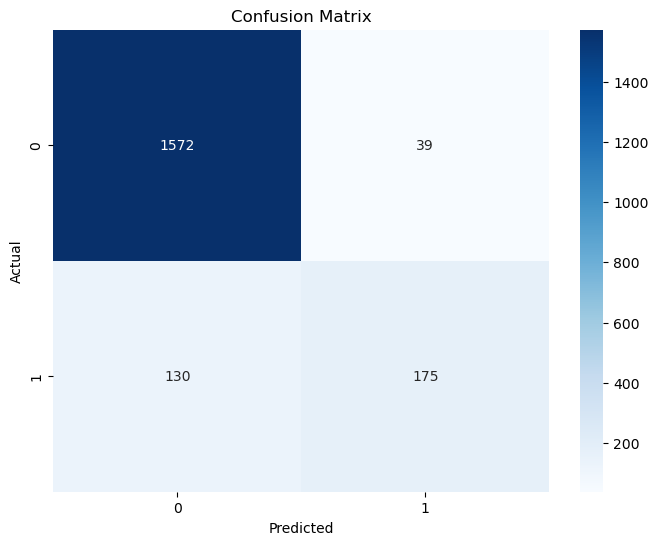

RandomForest Classifier Metrics:
AUC: 0.7747809628476355
Accuracy: 0.9117954070981211
Precision: 0.9067675021654173
Recall: 0.9117954070981211
Specificity: 0.6377665185971502
F1 Score: 0.9052740166267443
classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1611
           1       0.82      0.57      0.67       305

    accuracy                           0.91      1916
   macro avg       0.87      0.77      0.81      1916
weighted avg       0.91      0.91      0.91      1916

----------------------------------
1572 39 130 175
pod:  0.5737704918032787
pof:  0.024208566108007448
AUC:  0.7747809628476356
accuracy:  0.9117954070981211
precision:  0.8177570093457944
recall:  0.5737704918032787
specificity:  0.9757914338919925
F1:  0.6743737957610789


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a RandomForestClassifier instance
#random_forest = RandomForestClassifier(random_state=42)
random_forest = RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300)
 

print(random_forest.get_params())

# Train the random forest model
random_forest.fit(x_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("RandomForest Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'CONV_WOE', 'RF', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


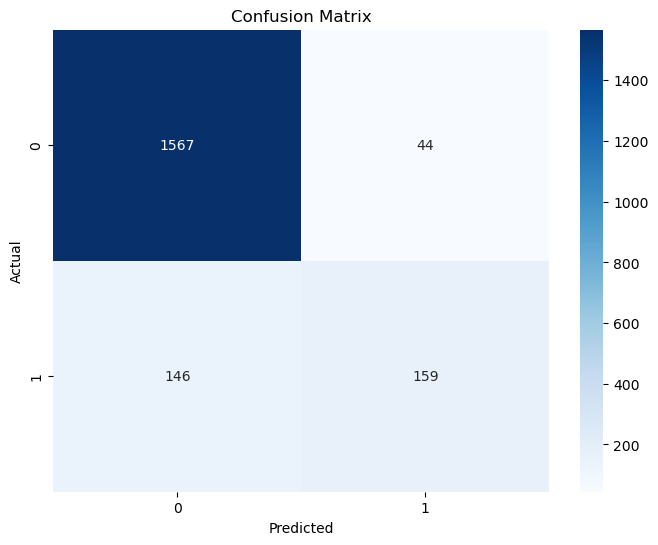

SVC Classifier Metrics:
AUC: 0.7469996234901446
Accuracy: 0.9008350730688935
Precision: 0.8938335833798897
Recall: 0.9008350730688935
Specificity: 0.5931641739113956
F1 Score: 0.892401022601914
classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1611
           1       0.78      0.52      0.63       305

    accuracy                           0.90      1916
   macro avg       0.85      0.75      0.78      1916
weighted avg       0.89      0.90      0.89      1916

----------------------------------
1567 44 146 159
pod:  0.521311475409836
pof:  0.027312228429546864
AUC:  0.7469996234901446
accuracy:  0.9008350730688935
precision:  0.7832512315270936
recall:  0.521311475409836
specificity:  0.9726877715704532
F1:  0.6259842519685039


In [36]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create an SVC (Support Vector Classification) instance
#svm_classifier = SVC(random_state=42)
svm_classifier = SVC(C=1)


print(svm_classifier.get_params())

# Train the SVM model
svm_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVC Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'CONV_WOE', 'SVM', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


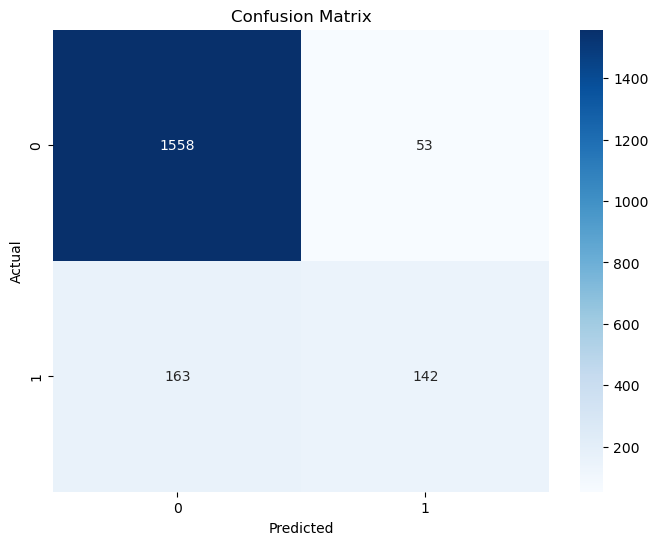

KNeighbors Classifier Metrics:
AUC: 0.7163374749417427
Accuracy: 0.8872651356993737
Precision: 0.8770986041337915
Recall: 0.8872651356993737
Specificity: 0.5454098141841117
F1 Score: 0.8767251702351088
KNeighbors Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1611
           1       0.73      0.47      0.57       305

    accuracy                           0.89      1916
   macro avg       0.82      0.72      0.75      1916
weighted avg       0.88      0.89      0.88      1916

----------------------------------
1558 53 163 142
pod:  0.46557377049180326
pof:  0.032898820608317815
AUC:  0.7163374749417427
accuracy:  0.8872651356993737
precision:  0.7282051282051282
recall:  0.46557377049180326
specificity:  0.9671011793916822
F1:  0.568


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNeighborsClassifier instance with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
#knn_classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=27)

print(knn_classifier.get_params())

# Train the KNN model
knn_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("KNeighbors Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("KNeighbors Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'CONV_WOE', 'KNN', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


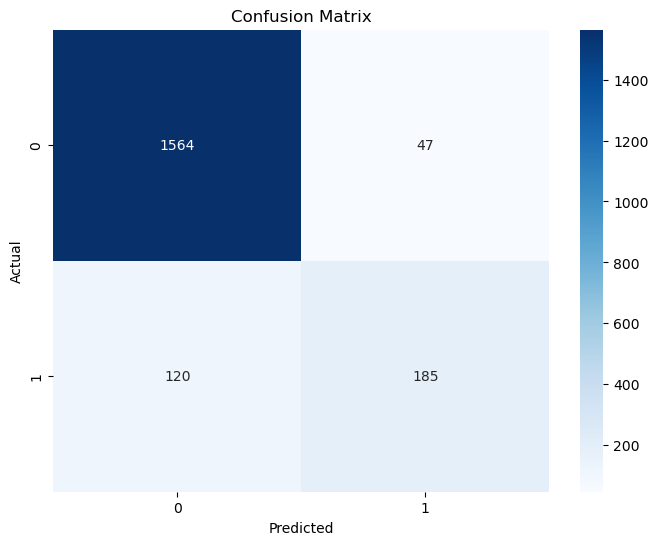

GradientBoosting Classifier Metrics:
AUC: 0.788691475613355
Accuracy: 0.912839248434238
Precision: 0.9078356509050528
Recall: 0.912839248434238
Specificity: 0.6645437027924718
F1 Score: 0.9078804279326199
GradientBoostingClassifier Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1611
           1       0.80      0.61      0.69       305

    accuracy                           0.91      1916
   macro avg       0.86      0.79      0.82      1916
weighted avg       0.91      0.91      0.91      1916

----------------------------------
1564 47 120 185
pod:  0.6065573770491803
pof:  0.029174425822470516
AUC:  0.788691475613355
accuracy:  0.912839248434238
precision:  0.7974137931034483
recall:  0.6065573770491803
specificity:  0.9708255741775295
F1:  0.6890130353817504


In [38]:
 # Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
 
# Initialize GradientBoosting classifier
#gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
#gb_clf = GradientBoostingClassifier(min_samples_leaf=2, n_estimators=50)
#gb_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=50)



print(gb_clf.get_params())

# Train GradientBoosting classifier
gb_clf.fit(x_train, y_train)
  

# Predict on the test set
y_pred = gb_clf.predict(x_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("GradientBoosting Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("GradientBoostingClassifier Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'CONV_WOE', 'GB', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


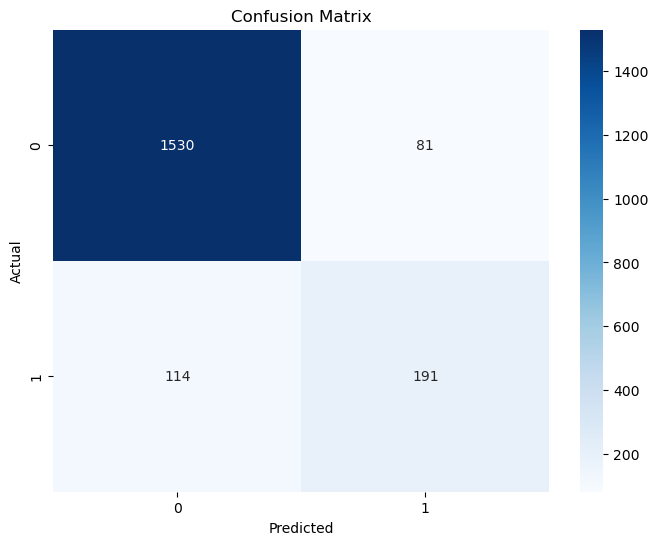

XGB Classifier Metrics:
AUC: 0.7879750892938914
Accuracy: 0.8982254697286013
Precision: 0.8942907699820095
Recall: 0.8982254697286013
Specificity: 0.6777247088591816
F1 Score: 0.8958310139684443
  Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1611
           1       0.70      0.63      0.66       305

    accuracy                           0.90      1916
   macro avg       0.82      0.79      0.80      1916
weighted avg       0.89      0.90      0.90      1916

----------------------------------
1530 81 114 191
pod:  0.6262295081967213
pof:  0.05027932960893855
AUC:  0.7879750892938914
accuracy:  0.8982254697286013
precision:  0.7022058823529411
recall:  0.6262295081967213
specificity:  0.9497206703910615
F1:  0.6620450606585788


In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBClassifier instance
xgb_classifier = XGBClassifier(random_state=42)

print(xgb_classifier.get_params())

# Train the XGBoost model
xgb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("XGB Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("  Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'CONV_WOE', 'XGB', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

In [40]:
import tensorflow as tf
print(tf.__version__)

2.14.0


Epoch 1/10
613/613 [==============================] - 3s 3ms/step - loss: 0.3230 - accuracy: 0.8736 - val_loss: 0.2704 - val_accuracy: 0.8898
Epoch 2/10
613/613 [==============================] - 2s 2ms/step - loss: 0.2695 - accuracy: 0.8959 - val_loss: 0.2610 - val_accuracy: 0.8924
Epoch 3/10
613/613 [==============================] - 2s 2ms/step - loss: 0.2609 - accuracy: 0.8993 - val_loss: 0.2526 - val_accuracy: 0.8963
Epoch 4/10
613/613 [==============================] - 2s 2ms/step - loss: 0.2553 - accuracy: 0.8982 - val_loss: 0.2655 - val_accuracy: 0.8943
Epoch 5/10
613/613 [==============================] - 2s 2ms/step - loss: 0.2538 - accuracy: 0.9003 - val_loss: 0.2598 - val_accuracy: 0.8995
Epoch 6/10
613/613 [==============================] - 2s 2ms/step - loss: 0.2514 - accuracy: 0.9018 - val_loss: 0.2504 - val_accuracy: 0.8950
Epoch 7/10
613/613 [==============================] - 2s 2ms/step - loss: 0.2496 - accuracy: 0.9018 - val_loss: 0.2511 - val_accuracy: 0.8963
Epoch 

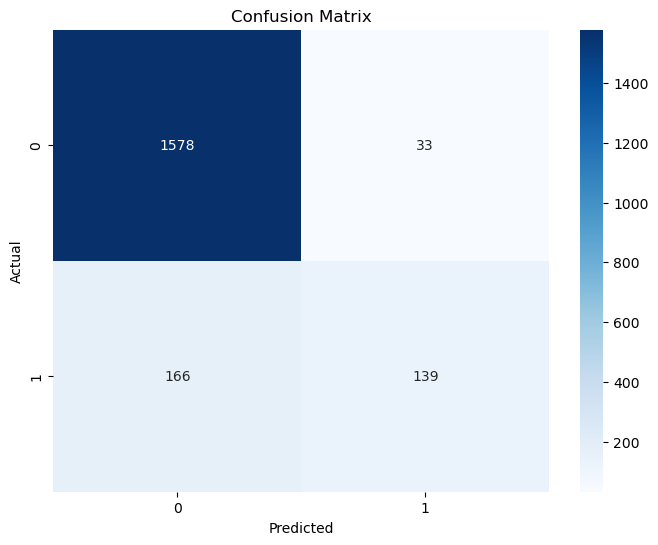

FNN   Metrics:
AUC: 0.7176267667979364
Accuracy: 0.8961377870563675
Precision: 0.889426911173935
Recall: 0.8961377870563675
Specificity: 0.5391157465395051
F1 Score: 0.8837167143755582
GaussianNB Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1611
           1       0.81      0.46      0.58       305

    accuracy                           0.90      1916
   macro avg       0.86      0.72      0.76      1916
weighted avg       0.89      0.90      0.88      1916

----------------------------------
1578 33 166 139
pod:  0.4557377049180328
pof:  0.020484171322160148
AUC:  0.7176267667979364
accuracy:  0.8961377870563675
precision:  0.8081395348837209
recall:  0.4557377049180328
specificity:  0.9795158286778398
F1:  0.5828092243186582


In [41]:
#FNN
 
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#create model

#x_train, x_test, y_train, y_test 

model = Sequential()
#get number of columns in training data
n_cols = x_test.shape[1]
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#compile model using mse as a measure of model performance
#model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
#train model
 
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=10, callbacks=[early_stopping_monitor])
# Predict on the test set
y_pred_step1 = model.predict(x_test)
y_pred=y_pred_step1.round()


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("FNN   Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("GaussianNB Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'CONV_WOE', 'FNN', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

Epoch 1/100
240/240 [==============================] - 5s 8ms/step - loss: 0.2327
Epoch 2/100
240/240 [==============================] - 2s 8ms/step - loss: 0.1243
Epoch 3/100
240/240 [==============================] - 2s 8ms/step - loss: 0.1017
Epoch 4/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0906
Epoch 5/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0855
Epoch 6/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0844
Epoch 7/100
240/240 [==============================] - 2s 7ms/step - loss: 0.0823
Epoch 8/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0809
Epoch 9/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0809
Epoch 10/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0811
Epoch 11/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0793
Epoch 12/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0781
Epoch 13/100


240/240 [==============================] - 2s 8ms/step - loss: 0.0530
Epoch 100/100
60/60 [==============================] - 1s 3ms/step


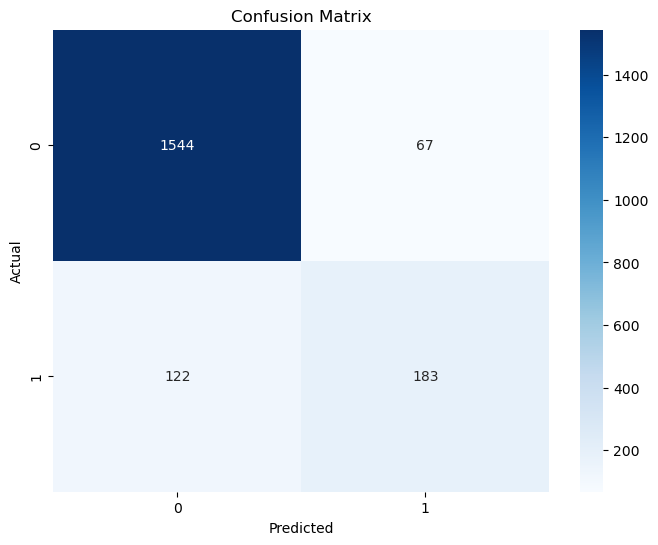

RNN Metrics:
AUC: 0.779205462445686
Accuracy: 0.901356993736952
Precision: 0.8957659765367524
Recall: 0.901356993736952
Specificity: 0.6570539311544198
F1 Score: 0.8972970717396186
RNN Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      1611
           1       0.73      0.60      0.66       305

    accuracy                           0.90      1916
   macro avg       0.83      0.78      0.80      1916
weighted avg       0.90      0.90      0.90      1916

----------------------------------
1544 67 122 183
pod:  0.6
pof:  0.04158907510862818
AUC:  0.779205462445686
accuracy:  0.901356993736952
precision:  0.732
recall:  0.6
specificity:  0.9584109248913718
F1:  0.6594594594594595


In [42]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
model = Sequential()

#Adding the first RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(units = 1))

#Compile the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Predict on the test set
y_pred_step1 = model.predict(x_test)
y_pred=y_pred_step1.round()


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("RNN Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("RNN Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'CONV_WOE', 'RNN-1', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


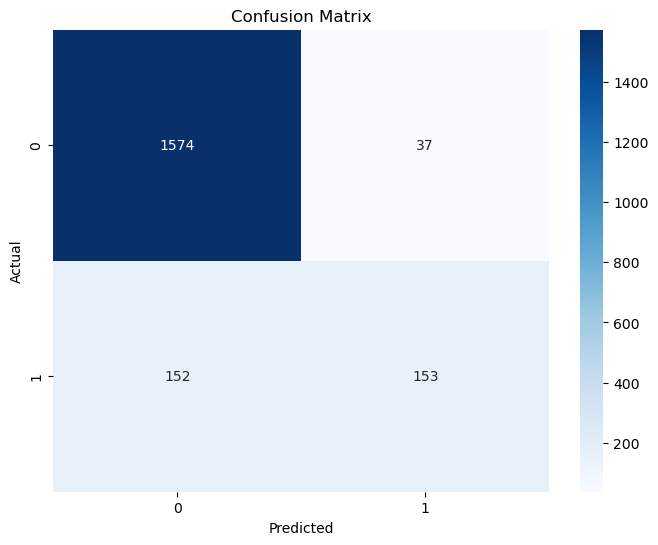

ExtraTreesClassifier Metrics:
AUC: 0.7393361215414516
Accuracy: 0.901356993736952
Precision: 0.8949544496339076
Recall: 0.901356993736952
Specificity: 0.5773152493459515
F1 Score: 0.8915981848700534
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1611
           1       0.81      0.50      0.62       305

    accuracy                           0.90      1916
   macro avg       0.86      0.74      0.78      1916
weighted avg       0.89      0.90      0.89      1916

----------------------------------
1574 37 152 153
pod:  0.5016393442622951
pof:  0.022967101179391682
AUC:  0.7393361215414517
accuracy:  0.901356993736952
precision:  0.8052631578947368
recall:  0.5016393442622951
specificity:  0.9770328988206083
F1:  0.618181818181818


In [43]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)



print(et_clf.get_params())

et_clf.fit(x_train, y_train)
# Predict on the test set
y_pred = et_clf.predict(x_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("ExtraTreesClassifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("Classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'CONV_WOE', 'ExtraTrees', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

C:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Decision Tree Classifier Accuracy: 0.8549060542797495
Random Forest Classifier Accuracy: 0.9065762004175365
Bagging Classifier with RF Tree Accuracy: 0.9086638830897703
Voting Classifier Accuracy: 0.889874739039666


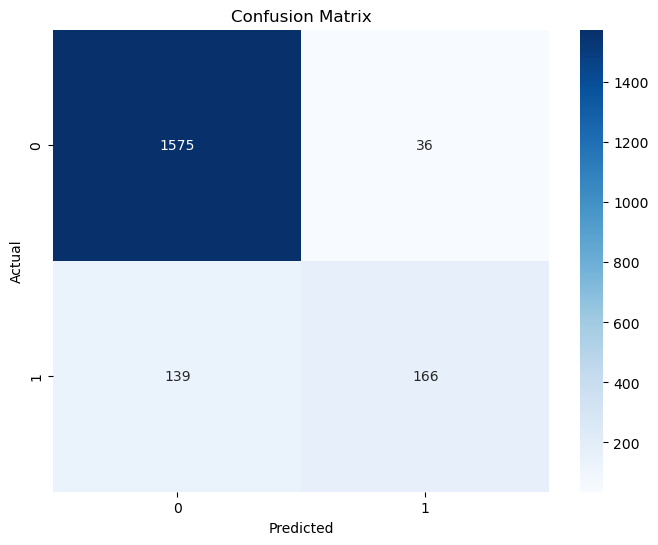

Bagging Classifier Metrics:
AUC: 0.7609579631834417
Accuracy: 0.9086638830897703
Precision: 0.9034428704866136
Recall: 0.9086638830897703
Specificity: 0.613252043277113
F1 Score: 0.9008008309986961
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1611
           1       0.82      0.54      0.65       305

    accuracy                           0.91      1916
   macro avg       0.87      0.76      0.80      1916
weighted avg       0.90      0.91      0.90      1916

----------------------------------
1575 36 139 166
pod:  0.5442622950819672
pof:  0.0223463687150838
AUC:  0.7609579631834417
accuracy:  0.9086638830897703
precision:  0.8217821782178217
recall:  0.5442622950819672
specificity:  0.9776536312849162
F1:  0.6548323471400395


In [44]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Initialize base classifiers
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Bagging classifier with Decision Tree as base estimator
bagging_dt_clf = BaggingClassifier(base_estimator=rf_clf, n_estimators=100, random_state=42)

# Initialize Voting classifier with Decision Tree and Random Forest as base estimators
voting_clf = VotingClassifier(estimators=[('dt', dt_clf), ('rf', rf_clf)], voting='hard')

# Train classifiers
dt_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)
bagging_dt_clf.fit(x_train, y_train)
voting_clf.fit(x_train, y_train)

# Make predictions
dt_predictions = dt_clf.predict(x_test)
rf_predictions = rf_clf.predict(x_test)
bagging_dt_predictions = bagging_dt_clf.predict(x_test)
voting_predictions = voting_clf.predict(x_test)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
bagging_dt_accuracy = accuracy_score(y_test, bagging_dt_predictions)
voting_accuracy = accuracy_score(y_test, voting_predictions)

print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Bagging Classifier with RF Tree Accuracy:", bagging_dt_accuracy)
print("Voting Classifier Accuracy:", voting_accuracy)


y_pred=bagging_dt_predictions

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Bagging Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("Classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)


List = ['Bank_loan_9578', 'CONV_WOE', 'Bagging', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

C:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


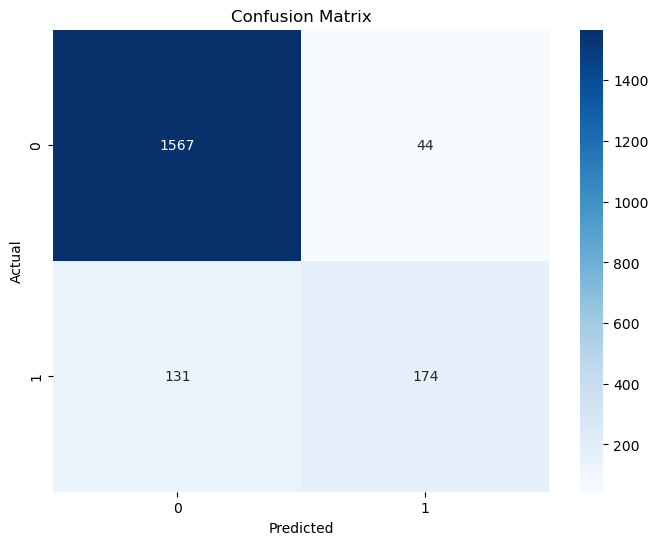

AdaBoost Classifier Metrics:
AUC: 0.7715897874245708
Accuracy: 0.9086638830897703
Precision: 0.9030022865901632
Recall: 0.9086638830897703
Specificity: 0.6345156917593713
F1 Score: 0.9022677946973927
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      1611
           1       0.80      0.57      0.67       305

    accuracy                           0.91      1916
   macro avg       0.86      0.77      0.81      1916
weighted avg       0.90      0.91      0.90      1916

----------------------------------
1567 44 131 174
pod:  0.5704918032786885
pof:  0.027312228429546864
AUC:  0.7715897874245708
accuracy:  0.9086638830897703
precision:  0.7981651376146789
recall:  0.5704918032786885
specificity:  0.9726877715704532
F1:  0.6653919694072659


In [45]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

 
# Initialize base estimator (Decision Tree)
dt_clf = DecisionTreeClassifier(max_depth=1, random_state=42)

rf_clf = RandomForestClassifier(max_depth=100, random_state=42)

svm_clf = SVC(random_state=42)


# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier(base_estimator=rf_clf, n_estimators=100, random_state=42)
#adaboost_clf = AdaBoostClassifier(algorithm="SAMME", n_estimators=100, random_state=42)


# Train AdaBoost classifier
adaboost_clf.fit(x_train, y_train)

# Make predictions
adaboost_predictions = adaboost_clf.predict(x_test)

y_pred=adaboost_predictions

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("AdaBoost Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("Classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)


List = ['Bank_loan_9578', 'CONV_WOE', 'AdaBoost', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

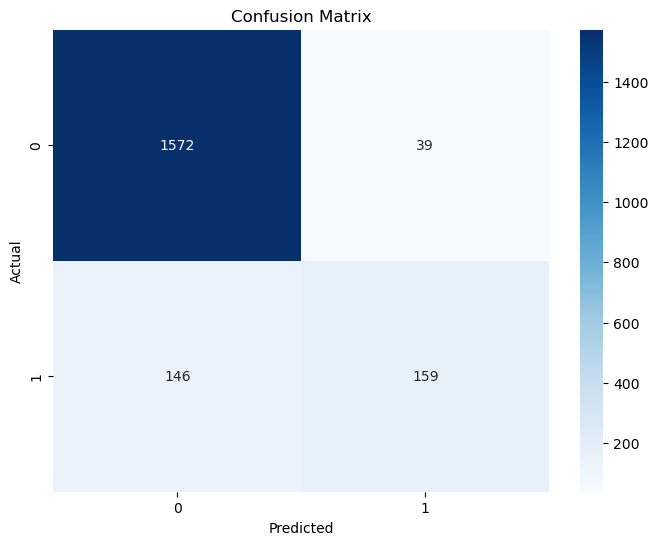

Voting ensemble Classifier Metrics:
AUC: 0.7485514546509143
Accuracy: 0.9034446764091858
Precision: 0.8971906962278469
Recall: 0.9034446764091858
Specificity: 0.5936582328926427
F1 Score: 0.8947266057827677
Classifier Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.94      1611
           1       0.80      0.52      0.63       305

    accuracy                           0.90      1916
   macro avg       0.86      0.75      0.79      1916
weighted avg       0.90      0.90      0.89      1916

----------------------------------
1572 39 146 159
pod:  0.521311475409836
pof:  0.024208566108007448
AUC:  0.7485514546509143
accuracy:  0.9034446764091858
precision:  0.803030303030303
recall:  0.521311475409836
specificity:  0.9757914338919925
F1:  0.6322067594433399


In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
nb_clf = GaussianNB()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logistic_reg = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Create an ensemble of classifiers using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('xgb_classifier', xgb_classifier), 
    ('logistic_reg', logistic_reg)
], voting='hard')  # 'hard' for majority vote

# Train the ensemble model
ensemble_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = ensemble_classifier.predict(x_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Voting ensemble Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("Classifier Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'CONV_WOE', 'Voting', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

In [47]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
nb_clf = GaussianNB()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logistic_reg = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)


nb_clf.fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
random_forest.fit(x_train, y_train)
logistic_reg.fit(x_train, y_train)
svm_classifier.fit(x_train, y_train)
knn_classifier.fit(x_train, y_train)

# Make predictions
nb_predictions = nb_clf.predict(x_test)
dt_predictions = decision_tree.predict(x_test)
rf_predictions = random_forest.predict(x_test)
lr_predictions=logistic_reg.predict(x_test)
svm_predictions=svm_classifier.predict(x_test)
knn_predictions=knn_classifier.predict(x_test)
# Define weights for classifiers
nb_weight = 0.2
dt_weight = 0.0
rf_weight = 0.0
lr_weight = 0.3
svm_weight = 0.4
knn_weight = 0.1

# Ensemble prediction with weighted average
ensemble_predictions = (lr_weight * lr_predictions) + (nb_weight * nb_predictions)+(svm_weight*svm_predictions)+(knn_weight*knn_predictions)
ensemble_predictions = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]

# Evaluate accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(ensemble_accuracy)

0.9034446764091858
